In [0]:
import pandas as pd

In [0]:
from google.colab import files
files.upload()

In [0]:
!ls

In [0]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min())/(x.max() - x.min()))

In [0]:
diabetes.head()

In [0]:
import tensorflow as tf

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [0]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

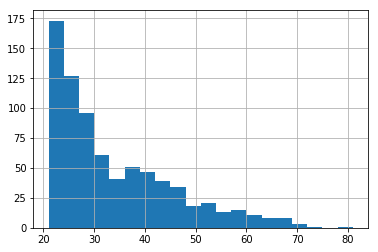

In [15]:
diabetes['Age'].hist(bins=20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi,
            diabetes_pedigree, age_bucket]

In [0]:
x_data = diabetes.drop('Class', axis=1)

In [0]:
labels = diabetes['Class']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=Y_train,
                                                batch_size=10, num_epochs=1000,
                                                shuffle=True)

In [26]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_e_yayhm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f67c130b6d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_e_yayhm/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 167.618
INFO:tensorflow:loss = 6.480419, step = 101 (0.605 sec)
INFO:

In [0]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, y=Y_test,
                                                  batch_size=10,
                                                  num_epochs=1,
                                                  shuffle=False)

In [31]:
results = model.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-16T10:14:16Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp_e_yayhm/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-16-10:14:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.7948148, auc_precision_recall = 0.64380467, average_loss = 0.52861094, global_step = 1000, label/mean = 0.35064936, loss = 5.08788, precision = 0.671875, prediction/mean = 0.35290158, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_e_yayhm/model.ckpt-1000


In [32]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7948148,
 'auc_precision_recall': 0.64380467,
 'average_loss': 0.52861094,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.08788,
 'precision': 0.671875,
 'prediction/mean': 0.35290158,
 'recall': 0.5308642}

In [0]:
pred_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                   batch_size=10,
                                                   num_epochs=1,
                                                   shuffle=False)

In [0]:
predictions = model.predict(pred_input_fn)

In [0]:
list(predictions)

In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,
                                                       dimension=4)

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, embedded_group_col,
            diabetes_pedigree, age_bucket]

In [0]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

In [0]:
input_fn = tf.estimator.inputs.pandas_input_fn(X_train, Y_train, batch_size=10,
                                              num_epochs=1000, shuffle=True)

In [0]:
dnn_model.train(input_fn, steps=1000)

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=Y_test,
                                                     batch_size=10, num_epochs=1, shuffle=False)

In [0]:
dnn_model.evaluate(eval_input_func)